# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case we are going to simplyfy it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [2]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-05-21 22:47:14.599248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


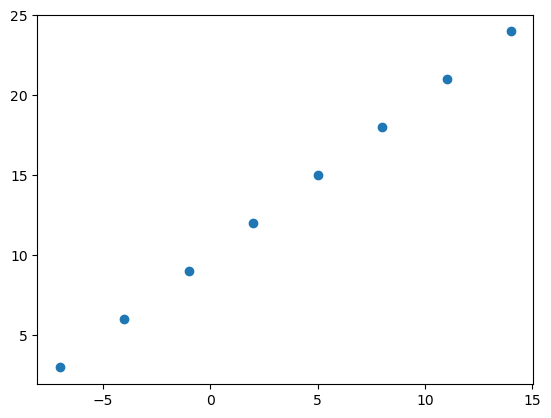

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create futures
X = np.array([-7.0, -4.0, -1.0, 2.0,5.0,8.0,11.0,14.0])
y = np.array([3,6,9,12,15,18,21,24.0])

plt.scatter(X,y)

In [4]:
X = tf.constant(X)
y = tf.constant(y)
X,y

2023-05-21 22:47:25.240177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape =X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

### steps in Modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a mdel - letting the model try to find patterns between X & y (features and labels).

In [6]:
tf.config.list_physical_devices("GPU")

[]

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', optimizer='sgd', metrics=['mae'])

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 336ms/step - loss: 17.7114 - mae: 17.7114
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 17.4302 - mae: 17.4302
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 17.1489 - mae: 17.1489
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 16.8677 - mae: 16.8677
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 16.5864 - mae: 16.5864


In [8]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 85ms/step


array([[-11.565564]], dtype=float32)

In [10]:
y_pred+11

array([[-0.56556416]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number oh hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or peerhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [18]:
# Lets re-build our model
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=['mae'])

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 313ms/step - loss: 8.3013 - mae: 8.3013
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2968 - mae: 8.2968
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2923 - mae: 8.2923
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2878 - mae: 8.2878
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2833 - mae: 8.2833
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2788 - mae: 8.2788
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2743 - mae: 8.2743
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2698 - mae: 8.2698
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2653 - mae: 8.2653
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2608 - mae: 8.2608
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 8.256

In [19]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 59ms/step


array([[27.05091]], dtype=float32)